# Code used for study area exploration (Chapter 4)

In [2]:
import geopandas as gpd
import numpy as np
import os
import rasterio
import matplotlib.pyplot as plt 
import seaborn as sns

## Terrain analysis

In [32]:
# Loading dem
dem_path = "../data/terrain/tinitaly_dem50m.tif"
with rasterio.open(dem_path) as src:
    all_data = src.read(1)  # read the first band
    fillvalue = src.nodata
    dem_data = np.ma.masked_equal(all_data, fillvalue)

    dem_transform = src.transform
    dem_crs = src.crs
    dem_bounds = src.bounds

# DEM characteristics
print(type(dem_data))
print(dem_data.shape)
print(f'CRS: {dem_crs}')
print(f'Bbox: {dem_bounds}')
print(f'Max elevation: {np.amax(dem_data)} m')
print(f'Min elevation: {np.amin(dem_data)} m')
print(f'Average elevation: {dem_data.mean()} m')

<class 'numpy.ma.core.MaskedArray'>
(1910, 2238)
CRS: PROJCS["WGS 84 / UTM zone 32N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",9],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Bbox: BoundingBox(left=614247.4307366736, bottom=5061622.641956749, right=726155.1390219606, top=5157166.588966932)
Max elevation: 3755.37109375 m
Min elevation: 65.0 m
Average elevation: 1401.2114116426812 m


ERROR 1: PROJ: internal_proj_identify: /Users/sarategoni/opt/anaconda3/share/proj/proj.db contains DATABASE.LAYOUT.VERSION.MINOR = 2 whereas a number >= 3 is expected. It comes from another PROJ installation.


In [33]:
# Altimetric areas
plain_mask = dem_data < 300
hill_mask = (dem_data >= 300) & (dem_data <= 600)
mountain_mask = dem_data > 600

total_area = np.sum(~dem_data.mask) # exclude fillvalue cells
plain_area = np.sum(plain_mask)
hill_area = np.sum(hill_mask)
mountain_area = np.sum(mountain_mask)

plain_percentage = (plain_area / total_area) * 100
hill_percentage = (hill_area / total_area) * 100
mountain_percentage = (mountain_area / total_area) * 100

print(f"Plain area (<300m): {plain_percentage:.2f}%")
print(f"Hill area (300-600m): {hill_percentage:.2f}%")
print(f"Mountain area (>600m): {mountain_percentage:.2f}%")

Plain area (<300m): 4.45%
Hill area (300-600m): 8.09%
Mountain area (>600m): 87.46%


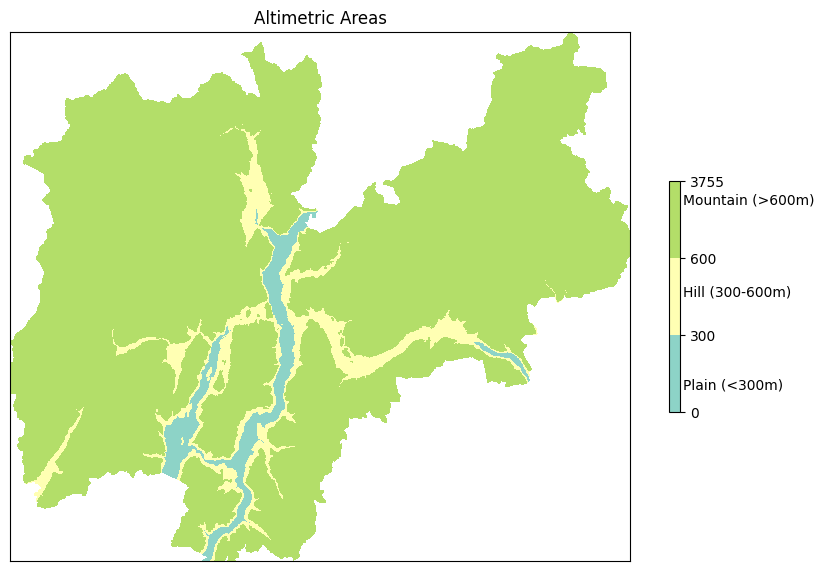

In [35]:
# Plot: Altimetric areas
fig = plt.figure(figsize = (10, 10))
contourf = plt.contourf(dem_data, cmap = "Set3", 
            levels = [0, 300, 600, np.max(dem_data)])
cbar = plt.colorbar(shrink=0.3)
cbar.ax.text(1.2, 0.1, 'Plain (<300m)', transform=cbar.ax.transAxes)
cbar.ax.text(1.2, 0.5, 'Hill (300-600m)', transform=cbar.ax.transAxes)
cbar.ax.text(1.2, 0.9, 'Mountain (>600m)', transform=cbar.ax.transAxes)

# # contour lines
# contour = plt.contour(dem_data, cmap = "binary", 
#             levels = list(range(0, int(np.max(dem_data)), 500)))
# plt.clabel(contour, inline=True, fontsize=8)
# cbar = plt.colorbar(label='Elevation (m)', shrink=0.5)

plt.title("Altimetric Areas")
# plt.xlabel('lon')
# plt.ylabel('lat')

plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
# remove ticks
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, 
               left=False, right=False, labelbottom=False, labelleft=False)
plt.show()

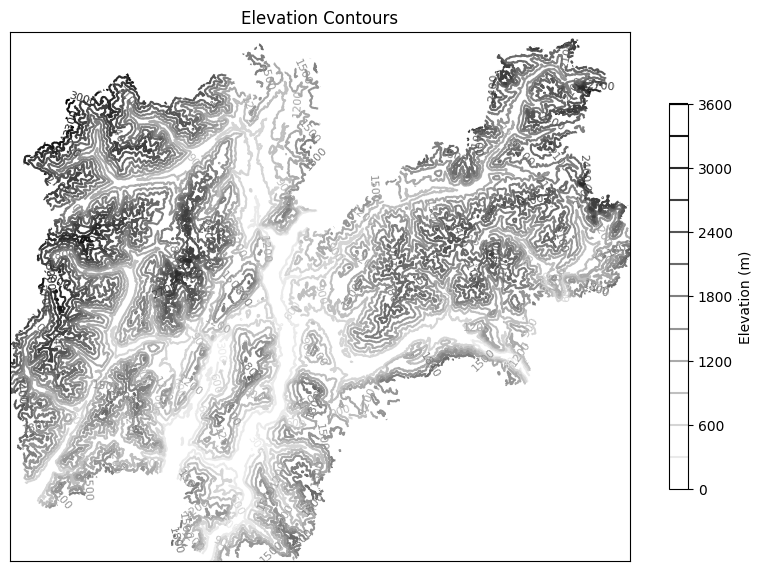

In [ ]:
# Plot: elevation contour lines
fig = plt.figure(figsize = (10, 10))
contour = plt.contour(dem_data, cmap = "binary", 
            levels = list(range(0, int(np.max(dem_data)), 300)))
plt.clabel(contour, inline=True, fontsize=8)

plt.title("Elevation Contours")
# plt.xlabel('lon')
# plt.ylabel('lat')
cbar = plt.colorbar(label='Elevation (m)', shrink=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.gca().invert_yaxis()
# remove ticks
plt.gca().tick_params(axis='both', which='both', bottom=False, top=False, 
               left=False, right=False, labelbottom=False, labelleft=False)

plt.show()

In [42]:
# Corpi idrici sotterranei
cis_path = "../data/water/corpi_sott/cis_pta2022_v.shp"
cis_gdf = gpd.read_file(cis_path)
cis_gdf.to_crs(dem_crs, inplace=True)
cis_gdf.columns

Index(['objectid', 'classid', 'codice_pat', 'codice_eu', 'idronimo',
       'comp_idrog', 'aree_prot', 'area', 'pr_conf', 'imp_conf', 'pr_sign',
       'imp_sign', 'rischio', 'quan_14_19', 'chim_14_19', 'sito_qual',
       'sito_quan', 'inquinanti', 'obiet_chim', 'obiet_quan', 'esenzioni',
       'misure', 'note', 'commenti', 'dataagg', 'datafine', 'geometry'],
      dtype='object')

In [45]:
len(cis_gdf)

22

<Axes: >

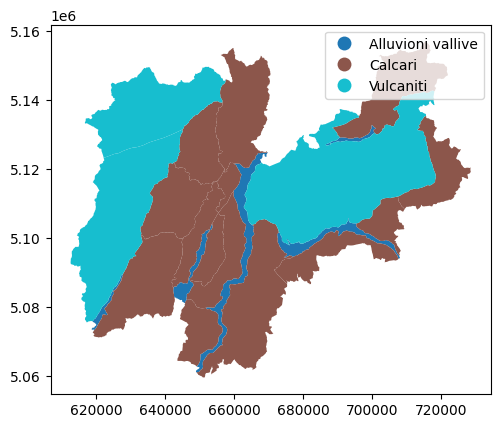

In [47]:
cis_gdf.plot(column='comp_idrog', legend=True)

# Huts statistics

In [3]:
huts = gpd.read_parquet('../data/alternatives_qual.parquet')
huts.head(3)

,standard_name,geometry,CR_WA_01,CR_WA_02,CR_EN_01,CR_EN_02,CR_EN_03,CR_EN_04,CR_SU_01,CR_SU_02,CR_AC_01,CR_AC_02,CR_AC_03
0,alpepozzavlancia,POINT (666584.351 5077095.370),spring,40.0,"[generator, photovoltaic, gas]",3,41.8,gasolio,[vehicle],"[imhoff_tank, grease_separator]",[trail],1,3
1,altissimodchiesa,POINT (646874.183 5074717.942),spring,30.0,"[generator, photovoltaic, gas]",3,22.5,renewable_option,[vehicle],"[imhoff_tank, sewage, grease_separator]",[trail],1,3
2,antermoia,POINT (704489.000 5150499.000),torr-lago,18.0,"[cogenerator, photovoltaic, gas]",3,61.4,gasolio,"[aerialway, vehicle]","[septic_tank, grid, grease_separator]",[trail],1,4


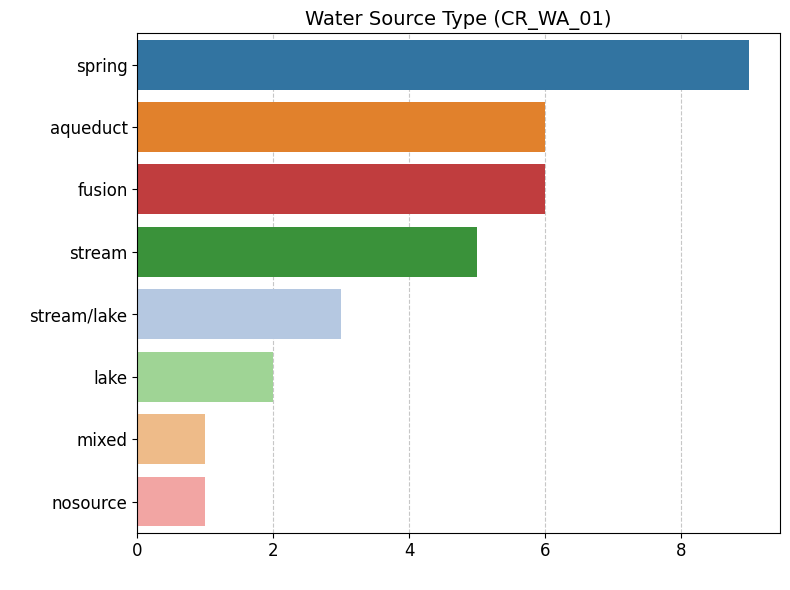

In [4]:
# Water source
# translate to english
huts.loc[huts['CR_WA_01'] == 'torr-lago', 'CR_WA_01'] = 'stream/lake'
huts.loc[huts['CR_WA_01'] == 'lago-torr', 'CR_WA_01'] = 'stream/lake'
huts.loc[huts['CR_WA_01'] == 'misto', 'CR_WA_01'] = 'mixed'
huts.loc[huts['CR_WA_01'] == 'torr-rio', 'CR_WA_01'] = 'stream'
huts.loc[huts['CR_WA_01'] == 'lago', 'CR_WA_01'] = 'lake'
huts.loc[huts['CR_WA_01'] == 'fusione', 'CR_WA_01'] = 'fusion'


# Plot
sorted_order = huts['CR_WA_01'].value_counts().index
# optional for using continuous color palette (in sns.countplot: palette=gradient_colors)
palette = sns.color_palette("winter", len(sorted_order))
gradient_colors = dict(zip(sorted_order, palette))

plt.figure(figsize=(8, 6))
plt.grid(linestyle='--', alpha=0.7, zorder=0)
sns.countplot(data=huts, y="CR_WA_01",stat='count', hue="CR_WA_01", order=sorted_order, palette='tab20', legend=False, zorder=2)
plt.title("Water Source Type (CR_WA_01)", fontsize=14)
plt.xlabel(" ", fontsize=10)
plt.ylabel(" ", fontsize=10)
#plt.xticks(rotation=45, ha="right")
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()


In [5]:
# Energy source
huts['CR_EN_01'] = huts['CR_EN_01'].apply(lambda x: ', '.join(x))
sorted_order = huts['CR_EN_01'].value_counts().index
palette = sns.color_palette("tab20", len(sorted_order))
gradient_colors = dict(zip(sorted_order, palette))

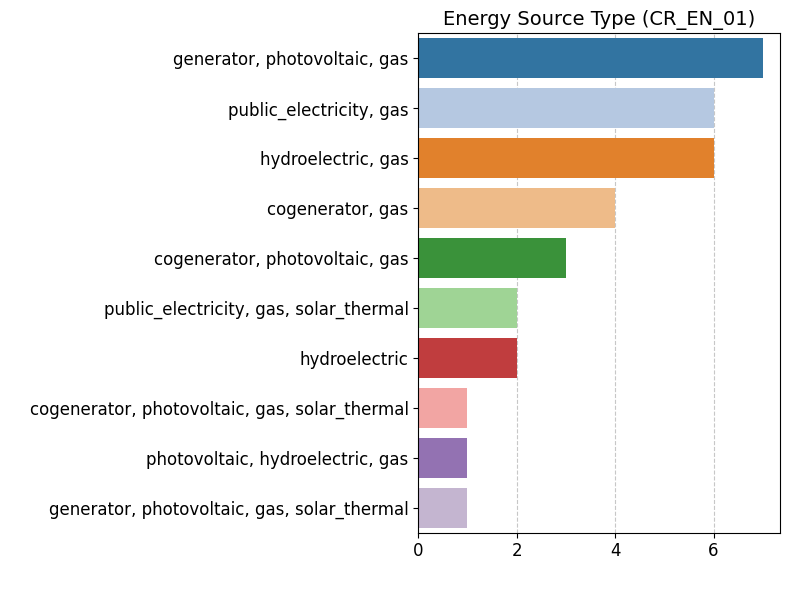

In [6]:
plt.figure(figsize=(8, 6))
plt.grid(linestyle='--', alpha=0.7, zorder=0)
sns.countplot(data=huts, orient='h', y="CR_EN_01", hue="CR_EN_01", order=sorted_order, palette=gradient_colors, legend=False, zorder=2)
plt.title("Energy Source Type (CR_EN_01)", fontsize=14)
plt.tick_params(axis='both', labelsize=12)  
plt.xlabel(" ", fontsize=10)
plt.ylabel(" ", fontsize=10)
plt.tight_layout()
plt.show()

In [7]:
# How many have gas?
count_gas = huts['CR_EN_01'].str.contains('gas').sum()
print(f"Number of huts using 'gas': {count_gas}")

# How many generator?
count_gen = huts['CR_EN_01'].str.contains('generator').sum()
count_cogen = huts['CR_EN_01'].str.contains('cogenerator').sum()
print(f"Number of huts using (co)generator: {count_gen + count_cogen}")

# How many photovoltaic?
count_pho = huts['CR_EN_01'].str.contains('photovoltaic').sum()
print(f"Number of huts using 'photovoltaic': {count_pho}")

# How many photovoltaic?
count_hydr = huts['CR_EN_01'].str.contains('hydroelectric').sum()
print(f"Number of huts using 'hydroelectric': {count_hydr}")

Number of huts using 'gas': 31
Number of huts using (co)generator: 24
Number of huts using 'photovoltaic': 13
Number of huts using 'hydroelectric': 9


In [8]:
huts.loc[huts['CR_EN_04'].isna()]

,standard_name,geometry,CR_WA_01,CR_WA_02,CR_EN_01,CR_EN_02,CR_EN_03,CR_EN_04,CR_SU_01,CR_SU_02,CR_AC_01,CR_AC_02,CR_AC_03
25,tosaetpedrotti,POINT (646611.171 5112931.074),spring,NaN,"cogenerator, gas",2,80.0,None,[aerialway],"[septic_tank, grid, grease_separator]",[trail],1,4
31,vioz,POINT (625753.000 5139701.000),fusion,60.0,"cogenerator, gas",2,80.0,None,[helicopter],"[septic_tank, grid, grease_separator]","[trail, lift_2300m]",2,5


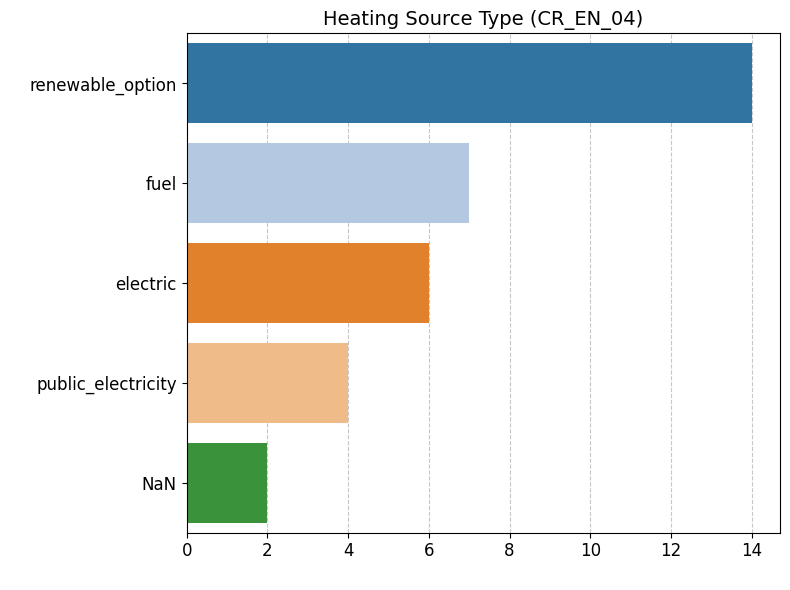

In [9]:
# Heating source
huts.loc[huts['CR_EN_04'] == 'gasolio', 'CR_EN_04'] = 'fuel'
huts.loc[huts['CR_EN_04'] == 'elettrico', 'CR_EN_04'] = 'electric'
huts.loc[huts['CR_EN_04'].isna(), 'CR_EN_04'] = 'NaN'

# Plot
sorted_order = huts['CR_EN_04'].value_counts().index
palette = sns.color_palette("tab20", len(sorted_order))
gradient_colors = dict(zip(sorted_order, palette))

plt.figure(figsize=(8, 6))
plt.grid(linestyle='--', alpha=0.7, zorder=0)
sns.countplot(data=huts, y="CR_EN_04", hue="CR_EN_04", order=sorted_order, palette=gradient_colors, legend=False, zorder=2)
plt.title("Heating Source Type (CR_EN_04)", fontsize=14)
#plt.xticks(rotation=45, ha="right")
plt.xlabel(" ")
plt.ylabel(" ")
plt.tick_params(axis='both', labelsize=12)
plt.tight_layout()
plt.show()

In [10]:
# Supply mode
huts['CR_SU_01'] = huts['CR_SU_01'].apply(lambda x: ', '.join(x))
sorted_order = huts['CR_SU_01'].value_counts().index
palette = sns.color_palette("tab20", len(sorted_order))
gradient_colors = dict(zip(sorted_order, palette))

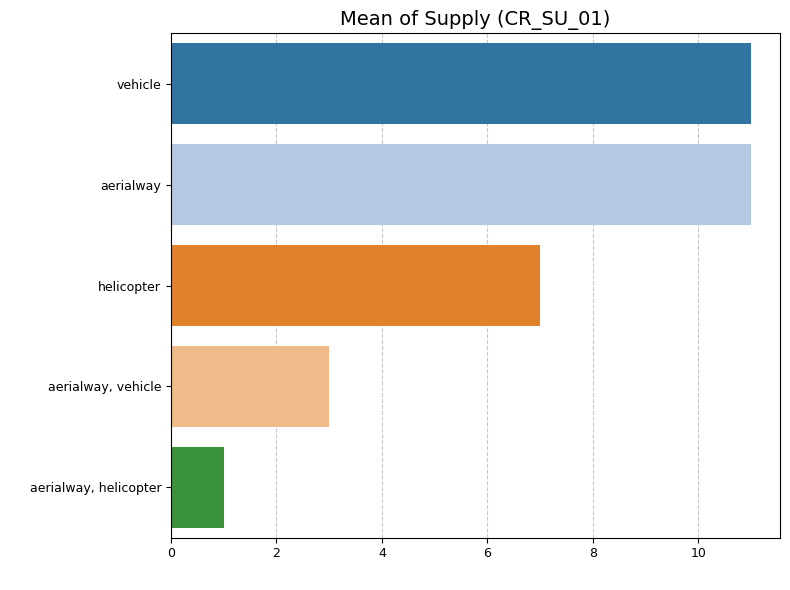

In [11]:
plt.figure(figsize=(8, 6))
plt.grid(linestyle='--', alpha=0.7, zorder=0)
sns.countplot(data=huts, orient='h', y="CR_SU_01", hue="CR_SU_01", order=sorted_order, palette=gradient_colors, legend=False, zorder=2)
plt.title("Mean of Supply (CR_SU_01)", fontsize=14)
plt.tick_params(axis='both', labelsize=9)  
plt.xlabel(" ", fontsize=10)
plt.ylabel(" ", fontsize=10)
plt.tight_layout()
plt.show()

In [12]:
# Waste management
huts['CR_SU_02'] = huts['CR_SU_02'].apply(lambda x: ', '.join(x))
sorted_order = huts['CR_SU_02'].value_counts().index
palette = sns.color_palette("tab20", len(sorted_order))
gradient_colors = dict(zip(sorted_order, palette))

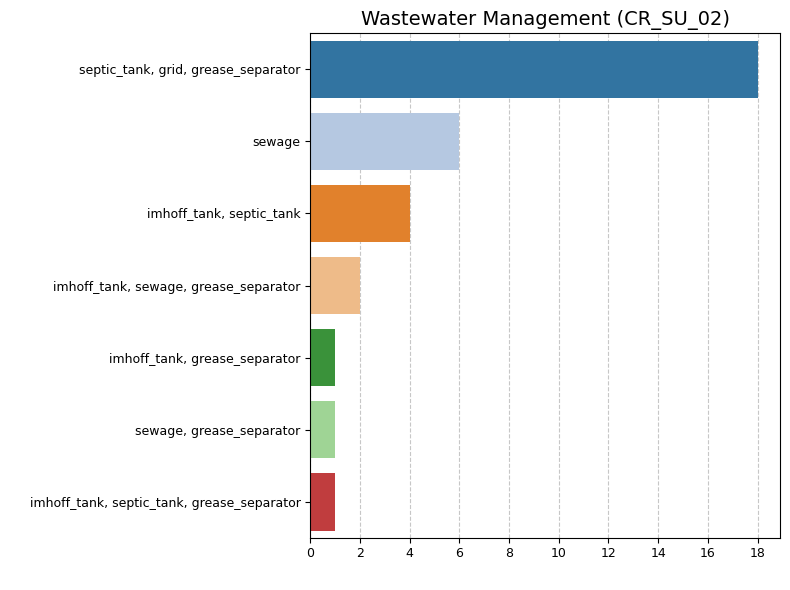

In [13]:
plt.figure(figsize=(8, 6))
plt.grid(linestyle='--', alpha=0.7, zorder=0)
sns.countplot(data=huts, orient='h', y="CR_SU_02", hue="CR_SU_02", order=sorted_order, palette=gradient_colors, legend=False, zorder=2)
plt.title("Wastewater Management (CR_SU_02)", fontsize=14)
max_x = plt.gca().get_xlim()[1]  
plt.xticks(ticks=range(0, int(max_x) + 1, 2))  
plt.tick_params(axis='both', labelsize=9)  
plt.xlabel(" ", fontsize=10)
plt.ylabel(" ", fontsize=10)
plt.tight_layout()
plt.show()

In [14]:
# Mean of access (visitors)
huts['CR_AC_01'] = huts['CR_AC_01'].apply(lambda x: ', '.join(x))
sorted_order = huts['CR_AC_01'].value_counts().index
palette = sns.color_palette("tab20", len(sorted_order))
gradient_colors = dict(zip(sorted_order, palette))

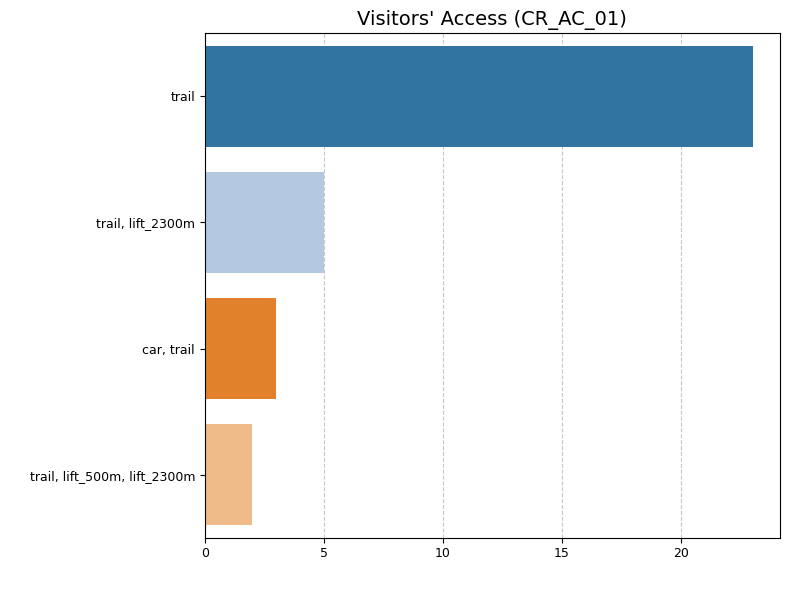

In [15]:
plt.figure(figsize=(8, 6))
plt.grid(linestyle='--', alpha=0.7, zorder=0)
sns.countplot(data=huts, y="CR_AC_01", hue="CR_AC_01", order=sorted_order, palette=gradient_colors, legend=False, zorder=2)
plt.title("Visitors' Access (CR_AC_01)", fontsize=14)
plt.tick_params(axis='both', labelsize=9)  
plt.xlabel(" ", fontsize=10)
plt.ylabel(" ", fontsize=10)
plt.tight_layout()
plt.show()

Plot with QGIS:
- huts + lifts + aerialways

In [17]:
huts.to_parquet("../data/alternatives_qual_eng.parquet")